In [1]:
import pandas as pd
import numpy as np
import requests as re
import matplotlib.pyplot as plt
%matplotlib inline

---

# Gathering data

read the csv file containing the enhanced twitter archive:

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

programmatically download and store the image predictions tsv file and read it:

In [3]:
r = re.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv',mode='wb') as file:
    file.write(r.content)

image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

read the json file containing the tweets of WeRateDogs:

In [4]:
with open('image-predictions.tsv',mode='wb') as file:
    file.write(r.content)

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [6]:
tweets = pd.read_json('tweet-json.txt',lines=True)

Because I was not able to get authorization to use twitter api, the cell below is commented.

In [7]:
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

---

# Assesing data

## Twitter Archive Enhanced

In [9]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitter_archive.duplicated().sum()

0

It seems we don't have any duplicated data.

In [13]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Penny            10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
Daisy             7
Toby              7
an                7
Buddy             7
Bailey            7
Koda              6
Rusty             6
Jack              6
Leo               6
Oscar             6
Milo              6
Jax               6
Stanley           6
Scout             6
Dave              6
Bella             6
Gus               5
               ... 
Halo              1
Raphael           1
Lilli             1
Suki              1
Dobby             1
Cleopatricia      1
Lambeau           1
Oreo              1
Brudge            1
Spark             1
Genevieve         1
Travis            1
Carll             1
Cheryl            1
Amy               1
Blue              1
Saydee            1
Remus             1
Odin              1


looks like 3rd of our dataset doesn't have names of the dogs.

In [14]:
twitter_archive.name.isnull().sum()

0

and it's not even recorded as null.

In [15]:
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

Some names are not really names ( ° ͜ʖ͡°). From observing the dataset names I can confirm that only the ones that are capitalized are real names.

In [16]:
np.isnan(twitter_archive.retweeted_status_id).sum()

2175

We have 2175 original tweets, we need to delete the rest.

---

### Quality Issues:

- Tweet id should be of type string instead of int.
- Timestamp should be of type datetime instead of string.
- Columns that are irrelevant to our analysis and should be discarded (in_reply.., retweeted..).
- None values in name column are not really None (typed as a string not a null value).
- Incorrect names in some of the dataset. Only the ones that are capitlized are real names.
- delete retweeted tweets and only keep the original ones.

### Tideness Issues:

- The last four columns (doggo, floofer, pupper, puppo) should not be column headers as they are values, combine them into one column to represent dog stages.

---

## Image Predictions

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_predictions.duplicated().sum()

0

In [21]:
image_predictions.tweet_id.duplicated().sum()

0

In [22]:
image_predictions.jpg_url.duplicated().sum()

66

We have found some duplicate pictures.

In [23]:
image_predictions[image_predictions.jpg_url == 'https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True


In [24]:
twitter_archive[twitter_archive.tweet_id == 712809025985978368]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stubert. He just arrived. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None


In [25]:
twitter_archive[twitter_archive.tweet_id == 798697898615730177]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
596,798697898615730177,NaN,NaN,2016-11-16 01:23:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stubert. He just arrive...,7.128090e+17,4.196984e+09,2016-03-24 01:11:29 +0000,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None


It seems that the duplicated pictures are of retweeted tweets.

### Quality Issues:

- Tweet id should be of type string instead of int.
- 66 duplicated entries that may be retweeted tweets.

### Tideness Issues:

- We only need 1 choice of a dog's breed and its confidence percentage. Therefore, we need to exclude ones that returns False in p1_dog,p2_dog,and p3_dog while taking into account the confidence percentage to be the highest.

---

## Twitter JSON

In [26]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [27]:
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [28]:
tweets.id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id, dtype: int64

In [29]:
tweets.id_str.head()

0    892420643555336192
1    892177421306343424
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id_str, dtype: int64

We don't have any retweets here.

In [30]:
tweets.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


### Quality Issues:

- change id column to tweet_id and its type to string instead of int to be consistent with the other datasets.
- Too many irrelevant column for our analysis ('contributors', 'coordinates', 'display_text_range', 'geo','id_str','in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user')

In [31]:
tweets.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

### Tideness Issues:

- All three datasets should be merged into one whole dataset.

---

## Final Assesment

### Quality Issues:

- Tweet id should be of type string instead of int for twitter_archive and image_predictions datasets.
- Timestamp should be of type datetime instead of string for twitter_archive dataset.
- None values in name column of twitter_archive dataset are not really None (typed as a string not a null value).
- Incorrect names in twitter_archive dataset. Only the ones that are capitlized are real names.
- delete retweeted tweets and only keep the original ones.
- 66 duplicated entries in jpg_url in image_predictions dataset that may be retweeted tweets.
- change id column in tweets JSON dataset to tweet_id and its type to string instead of int to be consistent with the other datasets.
- Columns that are irrelevant to our analysis and should be discarded in twitter_archive dataset (in_reply.., retweeted..).
- Too many irrelevant column for our analysis in tweets JSON('contributors', 'coordinates', 'display_text_range', 'geo','id_str','in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user')

### Tideness Issues:

- The last four columns (doggo, floofer, pupper, puppo) should not be column headers as they are values, combine them into one column to represent dog stages.
- We only need 1 choice of a dog's breed and its confidence percentage. Therefore, we need to exclude ones that returns False in p1_dog, p2_dog, and p3_dog while taking into account the confidence percentage to be the highest.
- All three datasets should be merged into one whole dataset.

---

## Cleaning data

First we need to make copies of the datasets to avoid losing the original ones.

In [32]:
twt_arch_clean = twitter_archive.copy()
img_predict_clean = image_predictions.copy()
twts_clean = tweets.copy()

- Tweet id should be of type string instead of int for twitter_archive and image_predictions datasets.

##### Define

convert tweet id column's data type from int to string using `astype` method for the two datasets.

##### Code

In [33]:
twt_arch_clean['tweet_id'] = twt_arch_clean['tweet_id'].astype(str)
img_predict_clean['tweet_id'] = img_predict_clean['tweet_id'].astype(str)

##### Test

In [34]:
twt_arch_clean['tweet_id'].head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

In [35]:
img_predict_clean['tweet_id'].head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object

- Timestamp should be of type datetime instead of string for twitter_archive dataset.

##### Define

convert timestamp column's data type from string to datetime using `to_datetime` method.

##### Code

In [36]:
twt_arch_clean['timestamp'] = pd.to_datetime(twt_arch_clean['timestamp'])

##### Test

In [37]:
twt_arch_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

- None values in name column of twitter_archive dataset are not really None (typed as a string not a null value).

##### Define

replace all None entries in name column with `np.nan`.

##### Code

In [38]:
twt_arch_clean['name'].replace('None',np.nan,inplace=True)

##### Test

In [39]:
twt_arch_clean['name'].value_counts()

a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
the              8
Sadie            8
Bailey           7
Toby             7
Buddy            7
Daisy            7
an               7
Jack             6
Leo              6
Scout            6
Koda             6
Rusty            6
Oscar            6
Jax              6
Stanley          6
Dave             6
Bella            6
Milo             6
very             5
Sunny            5
                ..
Halo             1
Raphael          1
Lilli            1
Suki             1
Dobby            1
Cleopatricia     1
Lambeau          1
Oreo             1
Brudge           1
Spark            1
Genevieve        1
Travis           1
Carll            1
Cheryl           1
Amy              1
Blue             1
Saydee           1
Remus            1
Odin             1
Kona             1
Sweet            1
Carter      

- Incorrect names in twitter_archive dataset. Only the ones that are capitlized are real names.

##### Define

replace all entries in name column that are not capitalized with np.nan.

##### Code

In [40]:
twt_arch_clean['name'] = twt_arch_clean['name'].replace('^[a-z]+',np.nan,regex=True)

##### Test

In [41]:
twt_arch_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
412            Albus
144            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
367            Alfie
858            Alfie
2238           Alfie
1616           Alfie
661            Alfie
51              Alfy
1701           Alice
201            Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
2326             NaN
2327             NaN
2328             NaN
2329             NaN
2330             NaN
2331             NaN
2332             NaN
2333             NaN
2334             NaN
2335             NaN
2336             NaN
2337             NaN
2338             NaN
2339             NaN
2340             NaN
2341             NaN
2342         

---

- delete retweeted tweets and only keep the original ones.

##### Define



##### Code

In [42]:
twt_arch_clean = twt_arch_clean[np.isnan(twt_arch_clean.retweeted_status_id)]

##### Test

In [43]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

---

- 66 duplicated entries in jpg_url in image_predictions dataset that may be retweeted tweets.

##### Define

drop duplicates in jpg_url column using `drop_duplicates`.

##### Code

In [44]:
img_predict_clean.jpg_url.drop_duplicates(inplace=True)

##### Test

In [45]:
img_predict_clean.jpg_url.duplicated().sum()

0

---

- change id column in tweets JSON dataset to tweet_id and its type to string instead of int to be consistent with the other datasets.

##### Define

rename id column to tweet_id and convert its type from int to string using `rename` and `astype`.

##### Code

In [46]:
twts_clean.rename(columns={'id':'tweet_id'},inplace=True)
twts_clean['tweet_id'] = twts_clean['tweet_id'].astype(str)

##### Test

In [47]:
twts_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

---

### Deleting columns that are irrelevant to our analysis
- Columns that are irrelevant to our analysis and should be discarded in twitter_archive dataset ('in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls').
- Too many irrelevant column for our analysis in tweets JSON('contributors', 'coordinates', 'display_text_range', 'geo','id_str','in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user')

##### Define

Drop the columns from each dataset using `drop`.

##### Code

In [48]:
twt_arch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [49]:
twts_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [50]:
twt_arch_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls'],inplace=True)

In [51]:
twts_clean.drop(columns=['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorited',
       'full_text', 'geo', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable'
        ,'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],inplace=True)

##### Test

In [52]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 186.9+ KB


In [53]:
twts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


---

- The last four columns (doggo, floofer, pupper, puppo) should not be column headers as they are values, combine them into one column to represent dog stages.

##### Define

Melt the *doggo, floofer, pupper, puppo* columns to a *dummy* and a *dog_stage* column. Then drop the intermediate *dummy* column, sort the values by dog_stage and drop duplicates by tweet_id. And replace all None values with `np.nan`.

##### Code

In [54]:
twt_arch_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [55]:
twt_arch_clean = pd.melt(twt_arch_clean, id_vars=['tweet_id', 'timestamp','text', 'rating_numerator', 'rating_denominator', 'name'], var_name= 'dummy',value_name='dog_stage')
twt_arch_clean.drop(columns='dummy',inplace=True)
twt_arch_clean = twt_arch_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id',keep='last')
twt_arch_clean.replace('None',np.nan,inplace=True)

##### Test

In [56]:
print(twitter_archive.query('doggo == "doggo" and retweeted_status_id == "NaN"').name.count())
print(twitter_archive.query('floofer == "floofer" and retweeted_status_id == "NaN"').name.count())
print(twitter_archive.query('pupper == "pupper" and retweeted_status_id == "NaN"').name.count())
print(twitter_archive.query('puppo == "puppo" and retweeted_status_id == "NaN"').name.count())

87
10
234
25


In [57]:
twt_arch_clean.dog_stage.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [58]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 7 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 135.9+ KB


---

- We only need 1 choice of a dog's breed and its confidence percentage. Therefore, we need to exclude ones that returns False in p1_dog, p2_dog, and p3_dog while taking into account the confidence percentage to be the highest.

##### Define

Create a function to extract dog breed and its confidence percentage. Then use the extracted data to store it into a dog_breed and a confidence_percentage column. Finally, drop irrelevant columns.

##### Code

In [59]:
dog_breed = []
confidence = []

def extract_breed_conf(df1):
    if df1.p1_dog is True:
        dog_breed.append(df1.p1)
        confidence.append(df1.p1_conf)
    elif df1.p2_dog is True:
        dog_breed.append(df1.p2)
        confidence.append(df1.p2_conf)
    elif df1.p3_dog is True:
        dog_breed.append(df1.p3)
        confidence.append(df1.p3_conf)
    else:
        dog_breed.append(np.nan)
        confidence.append(np.nan)

img_predict_clean.apply(extract_breed_conf,axis=1)
img_predict_clean['dog_breed'] = np.array(dog_breed)
img_predict_clean['confidence_percentage'] = np.array(confidence)
img_predict_clean.drop(columns=['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],inplace=True)

##### Test

In [60]:
img_predict_clean.head()

,tweet_id,jpg_url,dog_breed,confidence_percentage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


---

- All three datasets should be merged into one whole dataset.

##### Define



##### Code

In [61]:
df_final = pd.merge(twt_arch_clean,img_predict_clean,on='tweet_id', how='inner')

In [62]:
df_final = pd.merge(df_final,twts_clean,on='tweet_id',how='inner')

##### Test

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1994 non-null object
timestamp                1994 non-null datetime64[ns]
text                     1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1350 non-null object
dog_stage                306 non-null object
jpg_url                  1994 non-null object
dog_breed                1994 non-null object
confidence_percentage    1686 non-null float64
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 202.5+ KB


In [64]:
df_final.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence_percentage,favorite_count,retweet_count
0,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,NaN,NaN,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,nan,NaN,833,620
1,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,NaN,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,327,96
2,667455448082227200,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,7,10,Reese,NaN,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,203,66
3,667470559035432960,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,11,10,NaN,NaN,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175,273,102
4,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,7,10,NaN,NaN,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088,559,242


---

### Storing the master dataset

In [65]:
df_final.to_csv('twitter_archive_master.csv',index=False)

---

## Analyzing and Visualizing the master dataset

In [66]:
df_final.describe()

,rating_numerator,rating_denominator,confidence_percentage,favorite_count,retweet_count
count,1994.000000,1994.000000,1686.000000,1994.000000,1994.000000
mean,12.280843,10.532096,0.549936,8895.725677,2766.753260
std,41.497718,7.320710,0.299270,12213.193181,4674.698447
min,0.000000,2.000000,0.000010,81.000000,16.000000
25%,10.000000,10.000000,0.302892,1982.000000,624.750000
50%,11.000000,10.000000,0.550604,4136.000000,1359.500000
75%,12.000000,10.000000,0.821962,11308.000000,3220.000000
max,1776.000000,170.000000,0.999956,132810.000000,79515.000000


We can deduce from this table that all dogs are wonderful given their rating. The number of likes are higher than retweets, given that people are more likely to like a tweet than retweeting it. we had a tweet with more than 132k likes. let's pull this tweet real quick.

In [67]:
df_final[df_final.favorite_count == 132810]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence_percentage,favorite_count,retweet_count
1977,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,132810,48265


In [68]:
df_final[df_final.favorite_count == 132810].text.iloc[0]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

And for the most retweeted tweet:

In [69]:
df_final[df_final.retweet_count == 79515]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence_percentage,favorite_count,retweet_count
1727,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,131075,79515


In [70]:
df_final[df_final.retweet_count == 79515].text.iloc[0]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

Sadly, we don't have their names, but atleast we know which breed they are. Lakeland Terrier and Labrador Retriever

In [71]:
df_final.dog_breed.value_counts()

nan                            308
golden_retriever               158
Labrador_retriever             108
Pembroke                        95
Chihuahua                       91
pug                             62
toy_poodle                      51
chow                            48
Samoyed                         42
Pomeranian                      42
malamute                        33
Chesapeake_Bay_retriever        31
French_bulldog                  31
cocker_spaniel                  30
miniature_pinscher              25
Eskimo_dog                      22
Staffordshire_bullterrier       21
German_shepherd                 21
Cardigan                        21
Shih-Tzu                        20
Siberian_husky                  20
beagle                          20
Maltese_dog                     19
Rottweiler                      19
Shetland_sheepdog               19
Lakeland_terrier                18
kuvasz                          18
basset                          17
Italian_greyhound   

Looks like the Retriever bloodline are on top of the list of the most popular dog breeds with Golden Retriever and Labrador Retriever.

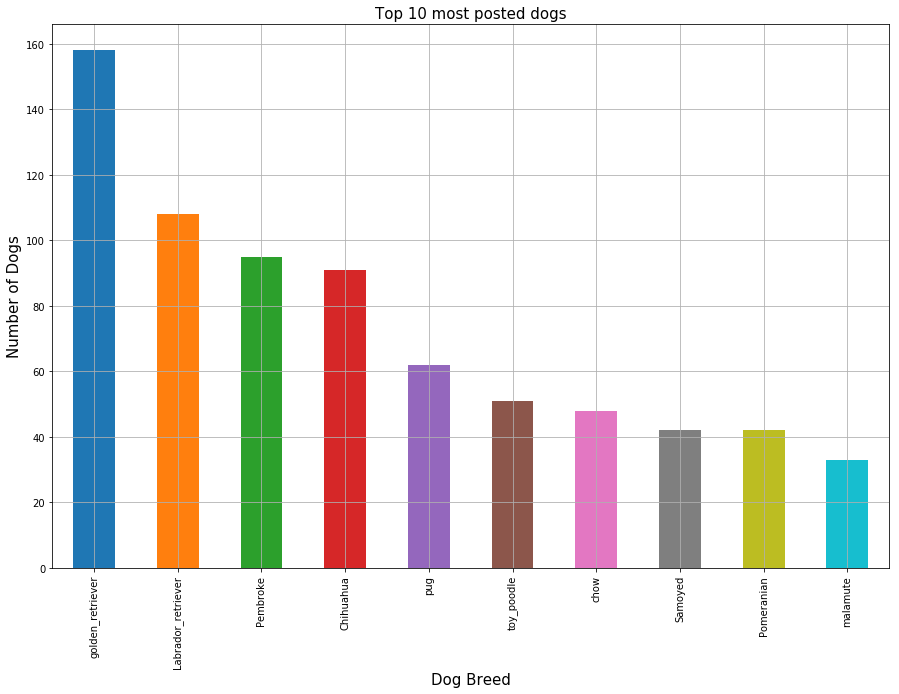

In [72]:
insight = df_final.groupby('dog_breed')['dog_breed'].count().sort_values(ascending=False)[1:11]
insight.plot(kind='bar',figsize=(15,10))
plt.title('Top 10 most posted dogs', fontsize= 15)
plt.xlabel('Dog Breed', fontsize= 15);
plt.ylabel('Number of Dogs', fontsize= 15);
plt.grid()

---

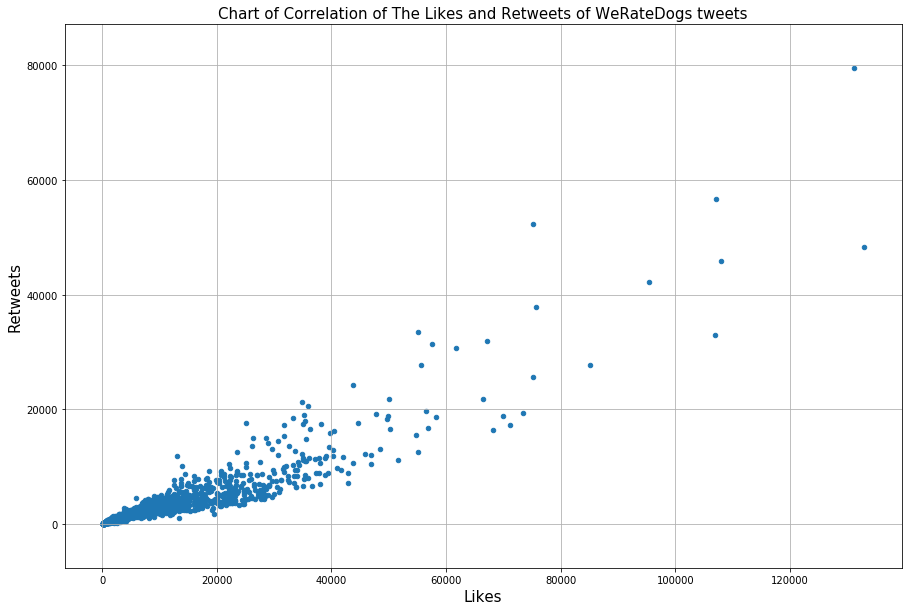

In [73]:
df_final.plot(x='favorite_count',y='retweet_count',kind='scatter',figsize=(15,10))
plt.title('Chart of Correlation of The Likes and Retweets of WeRateDogs tweets', fontsize= 15);
plt.xlabel('Likes', fontsize= 15);
plt.ylabel('Retweets', fontsize= 15);
plt.axis('equal');
plt.grid();

Looks like most of the tweets made has more likes than retweets. Having a positive correlation of likes and retweets for a dog rating account seems convincing.

---

Now let's look at how many tweets are posted weekly:

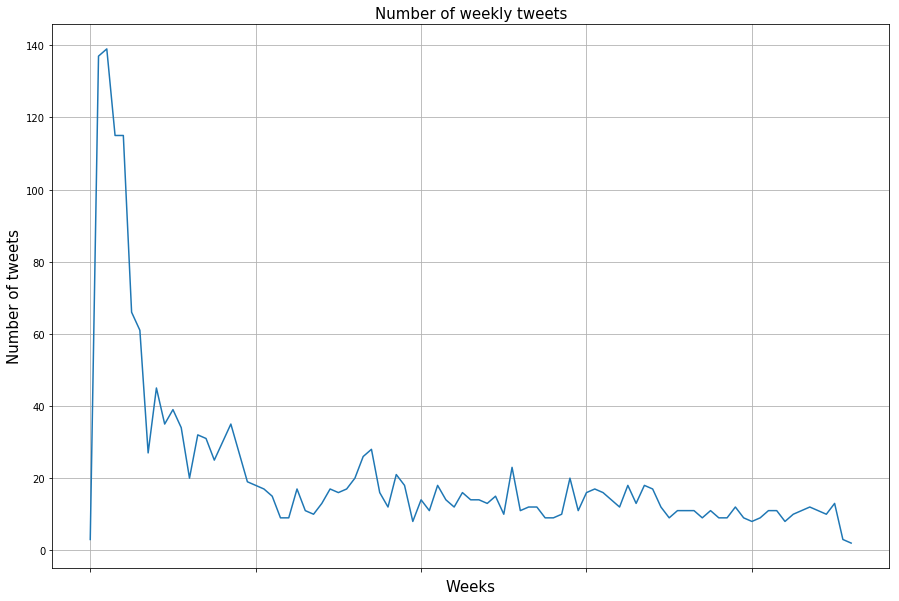

In [123]:
finsight = df_final.timestamp.groupby([df_final.timestamp.dt.year, df_final.timestamp.dt.week]).count()
finsight.plot(kind='line',figsize=(15,10));
plt.title('Number of weekly tweets', fontsize= 15);
plt.xlabel('Weeks', fontsize= 15);
plt.ylabel('Number of tweets', fontsize= 15);
plt.grid();

In [124]:
finsight.mean()

21.440860215053764

It seems that the first few weeks of the dataset had higher number of tweets compared to the rest of the timeline. Having about 21 tweets per week, we could say that everyday they post an average of 3 tweets per day, which is pretty active.